# Develop Customer Retention Strategies for The Model Fitness.

Waralaba pusat kebugaran bernama Model Fitness sedang mengembangkan strategi keterlibatan pelanggan berdasarkan data analitik.󠀲󠀡󠀥󠀥󠀧󠀧󠀨󠀤󠀳
󠀰Salah satu masalah yang paling sering dijumpai oleh layanan pusat kebugaran dan bahkan layanan lainnya adalah perputaran pelanggan atau customer churn.󠀲󠀡󠀥󠀥󠀧󠀧󠀨󠀥󠀳󠀰 

󠀰Indikator churn bisa berbeda dari satu bidang ke bidang lainnya.󠀲󠀡󠀥󠀥󠀧󠀧󠀨󠀩󠀳󠀰 󠀰Bagi bisnis pusat kebugaran, pelanggan akan dianggap pergi jika mereka tidak lagi kembali selama satu bulan.󠀲󠀡󠀥󠀥󠀧󠀧󠀩󠀢󠀳󠀰 Padahal, hal itu belum tentu benar. Seorang pelanggan bisa saja tidak mengunjungi pusat kebugaran selama satu bulan karena dia sedang berlibur, misalnya ke Bali, dan akan kembali mengunjungi pusat kebugaran setelah liburannya usai. Namun, kasus seperti ini memang jarang sekali terjadi.󠀲󠀡󠀥󠀥󠀧󠀧󠀩󠀣󠀳󠀰 Biasanya jika seorang pelanggan memutuskan untuk bergabung, kemudian datang beberapa kali lalu menghilang, kemungkinan besar pelanggan tersebut tidak akan kembali lagi.󠀲󠀡󠀥󠀥󠀧󠀧󠀩󠀤󠀳

## Tujuan

Proyek ini berfokus pada ramalan dan prediksi untuk mengurangi tingkat churn, Model Fitness telah melakukan digitalisasi terhadap sejumlah profil pelanggannya.󠀲󠀡󠀥󠀥󠀧󠀧󠀩󠀥󠀳󠀰 Data dilakukan pre-processing untuk membersihkan dan merapihkan data agar dapat diolah. Kemudian dilakukan analisis data untuk menganalisis profil para pelanggan dan mengembangkan strategi retensi pelanggan (customer retention).

Adapun hal yang perlu dilakukan:
* Mempelajari cara memprediksi probabilitas churn (untuk bulan berikutnya) bagi setiap pelanggan.
* Membuat segmentasi pengguna dengan memilih kelompok yang paling dominan dan mendeskripsikan fitur-fitur utamanya.
* Menganalisis faktor yang paling memengaruhi churn.
* Menarik kesimpulan dasar dan memberikan rekomendasi terkait cara meningkatkan layanan pelanggan
    * Mengidentifikasi kelompok target.
    * Merekomendasikan langkah-langkah untuk mengurangi churn.
    * Menjelaskan pola lain yang Anda temui terkait interaksi pelanggan.

## 1. Pra-pemrosesan Data

### Tahapan

Data proyek analisis ini disimpan dalam file `gym_churn_us.csv`

Proyek ini terdiri dari lima tahap:

1. Pra-pemrosesan Data.
2. Analisis Data Exploratif (EDA).
3. Membangun Model untuk Memprediksi Churn.
4. Membuat Klaster Pengguna.
5. Kesimpulan dan rekomendasi umum.

## 1. Pra-pemrosesan Data

In [1]:
# Import library
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import iplot

import numpy as np
from scipy import stats as st

from datetime import date, timedelta
import datetime as dt

import warnings
warnings.filterwarnings('ignore')
from IPython.display import Markdown, display

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import dendrogram, linkage 

In [3]:
# Define printmd() function to print code in blue color.
def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))

### 1.1. Memuat Data

In [4]:
# Read dataset
gym = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/gym_churn_us.csv', sep=',')

# Assign names to the dataframe
gym.name = 'gym_churn'

# Print a concise summary of the dataFrames 
# with pandas.DataFrame.info() method.
printmd("{}".format(gym.name), color='blue')

gym.info()
display(gym.head())

<span style='color:blue'>gym_churn</span>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


**Deskripsi data gym**: 

Dataset ini mencakup kolom-kolom berikut:
* `Churn` — churn aktual untuk bulan terkait
* Kolom dataset saat ini:
    * Data pengguna untuk bulan sebelumnya
    - `gender` — jenis kelamin pengguna
    - `Near_Location` — apakah pengguna tinggal atau bekerja di dekat lokasi pusat kebugaran
    - `Partner`  — apakah pengguna adalah karyawan perusahaan mitra (pusat kebugaran ini memiliki perusahaan mitra dan para karyawannya berhak untuk mendapatkan diskon; dalam hal ini, pusat kebugaran menyimpan informasi tentang perusahaan tempat kerja pelanggan mereka)
    - `Promo_friends` — apakah pengguna awalnya melakukan pendaftaran melalui penawaran "ajak teman" (mereka menggunakan kode promo teman saat membayar keanggotaan pertama mereka)
    - `Phone` — apakah pengguna memberikan nomor telepon mereka
    - `Age` — usia pengguna
    - `Lifetime` — waktu (dalam bulan) sejak kunjungan pertama pelanggan ke pusat kebugaran
* Data dari log kunjungan dan pembelian, serta data terkait status keanggotaan saat ini
    - `Contract_period` — 1 bulan, 3 bulan, 6 bulan, atau 1 tahun
    - `Month_to_end_contract`  — sisa bulan sebelum kontrak berakhir
    - `Group_visits` — apakah pengguna mengambil bagian dalam sesi kelompok
    - `Avg_class_frequency_total` — frekuensi rata-rata kunjungan per minggu selama masa hidup (lifetime) pelanggan
    - `Avg_class_frequency_current_month` — frekuensi rata-rata kunjungan per minggu sepanjang bulan yang sedang berjalan
    - `Avg_additional_charges_total` — jumlah total uang yang dikeluarkan untuk membayar layanan lain di pusat kebugaran: kafe, barang atletik, kosmetik, pijat, dll.

**Kesimpulan:**

Dalam analisis ini, kami bekerja dengan satu set data tentang perilaku pelanggan untuk gym chain.

* Tabel data `gym` memiliki nilai sebanyak 4000 data dengan Setiap baris mewakili satu pelanggan dan karakteristiknya.
* Asumsi umum untuk semua kasus selain jenis kelamin: 0 = tidak, 1 = ya; jenis kelamin: 0 = perempuan, 1 = laki-laki.

### 1.2. Preparasi Data

In [5]:
# Changed the column names to all lowercase letters
gym.columns = gym.columns.str.lower()
print(gym.columns)

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')


**Kesimpulan:**

* Tabel data `gym` diubah menjadi lower case untuk mempermudah analisis.

## 2. Analisis Data Exploratif (EDA)

### 2.1. Mempelajari Nilai Rata-rata dan Standar Deviasi Data.

In [6]:
# Check total missing values descending
gym.isna().sum().sort_values(ascending=False)

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

In [7]:
# Check duplicated data
gym.duplicated().sum()

0

In [8]:
#studying the mean values and standard deviation
gym.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


**Kesimpulan Sementara:**

* Tidak terdapat nilai hilang dan nilai duplikat pada data.
* Dari dataset dan memperhatikan nilai rata-rata dan standar deviasi, sebagian besar pelanggan tinggal di dekat gym, sekitar 48% pelanggan adalah karyawan dari perusahaan mitra, sebagian besar pelanggan memberikan nomor telepon mereka, 50% pelanggan memiliki masa kontrak 1 bulan dan rata-rata kontrak yang dipinjamkan adalah 5 bulan, rata-rata usia pelanggan adalah 29 tahun, rata-rata pelanggan menghabiskan 147 biaya tambahan, rata-rata masa pakai adalah 3,7 bulan dan rata-rata frekuensi kelas per minggu selama masa pakai adalah 1,9 : 1,8 selama satu bulan terakhir.

**Untuk mempermudah pembacaan dibuat plot dan data dibagi menjadi data binary, data integer, dan data float.**

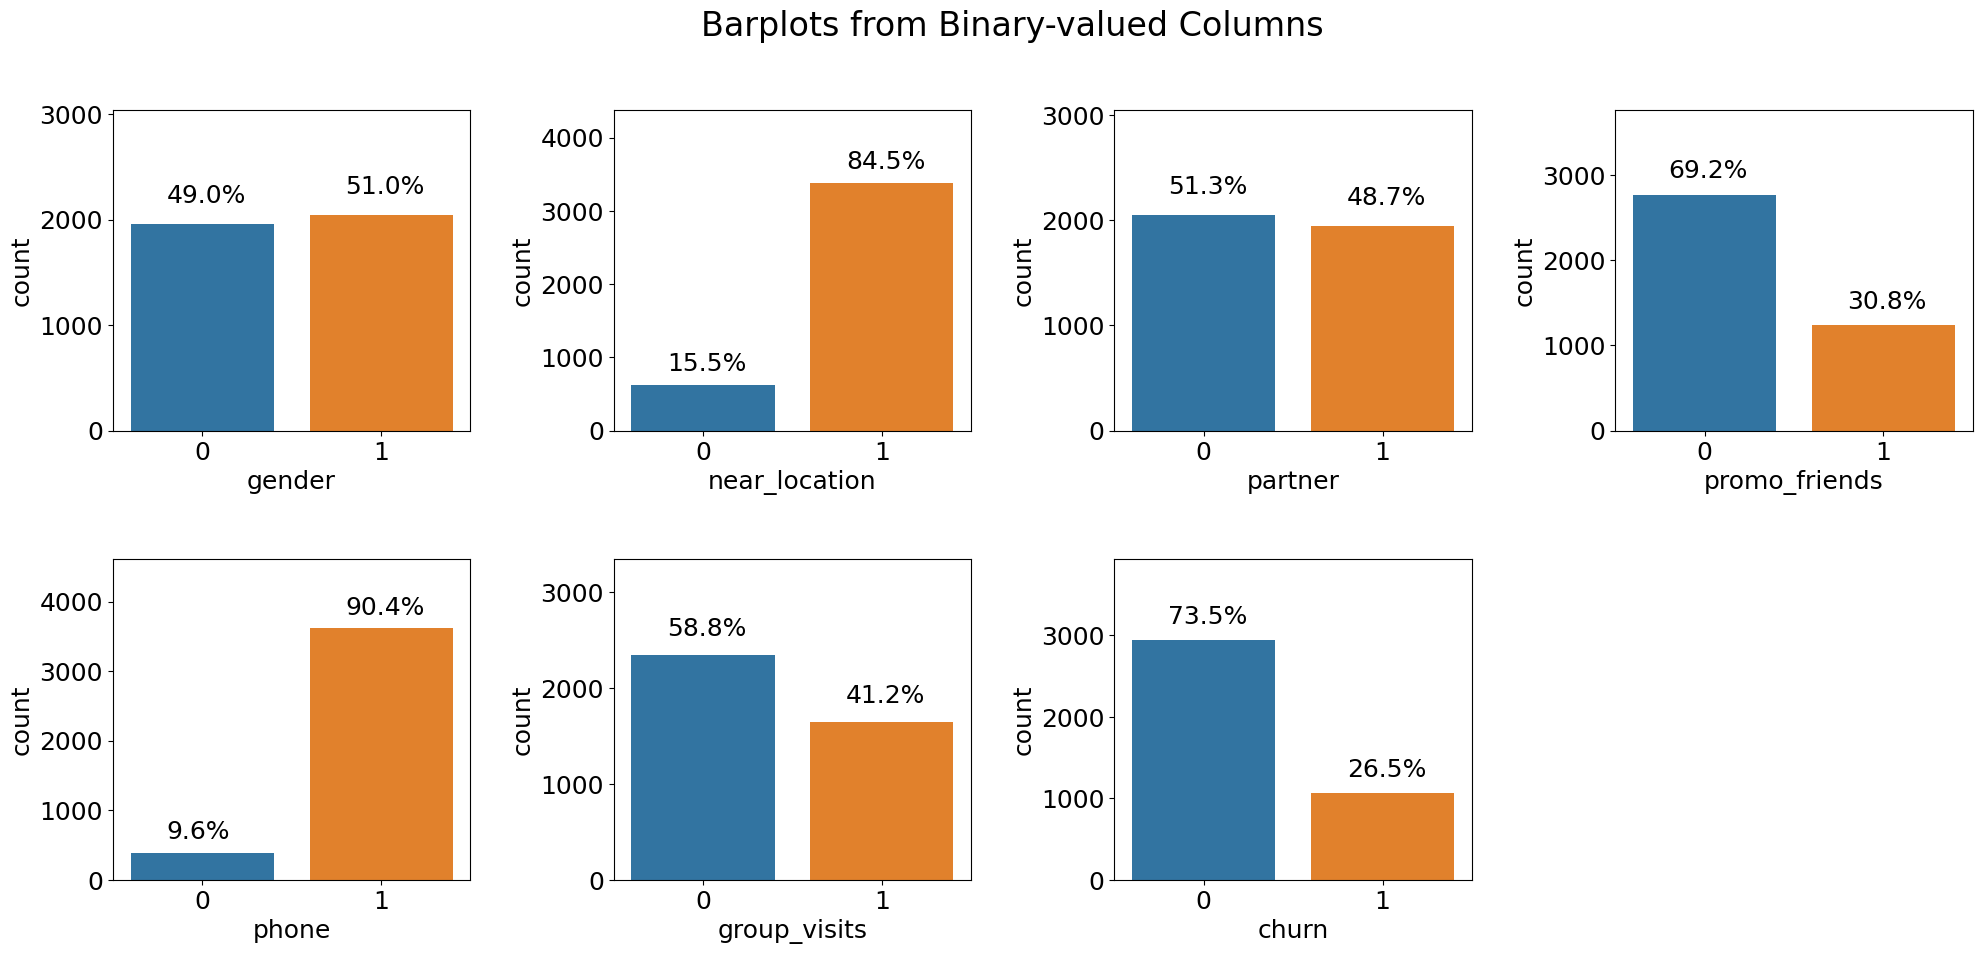

In [9]:
fig, ax = plt.subplots(2,4, figsize=(24, 10))
fig.delaxes(ax[1,3])
plt.subplots_adjust(wspace = 0.4)
plt.subplots_adjust(hspace = 0.4)


axs = ax.ravel()
j=0

for column in ['gender', 'near_location', 'partner', 
               'promo_friends', 'phone', 'group_visits','churn']:
    sns.countplot(x=column, data=gym, ax=axs[j])
 # create a list to collect the plt.patches data
    totals = []
# find the values and append to list
    for i in axs[j].patches:
        totals.append(i.get_height())
# set individual bar lables using above list
    total = sum(totals)
# set individual bar lables using above list
    for i in axs[j].patches:
    # get_x pulls left or right; get_height pushes up or down
        axs[j].text(i.get_x()+0.2, i.get_height()+200, \
            str(round((i.get_height()/total)*100, 1))+'%', fontsize=18, color='black')
    axs[j].xaxis.label.set_size(18)
    axs[j].yaxis.label.set_size(18)
    axs[j].tick_params(axis ='both',labelsize = 18)
    axs[j].set_ylim(0, gym[column].value_counts().max()+1000)

    j+=1

plt.suptitle('Barplots from Binary-valued Columns', fontsize=24)
plt.show()    

**Kesimpulan:**

Data yang diplotkan menunjukkan hal-hal berikut:

* Jumlah pelanggan pria dan wanita hampir sama;
* Hampir 85% pelanggan tinggal di dekat gym;
* Setengah pelanggan (sekitar 49%) adalah karyawan perusahaan mitra;
* Sepertiga pelanggan (sekitar 31%) mendaftar melalui promosi 'ajak teman';
* Sekitar 90% pelanggan memberikan nomor telepon;
* Hampir 60% pelanggan tidak mengambil bagian dalam sesi kelompok;
* Seperempat pelanggan (26,5%) melakukan churn.

In [10]:
# fix the month_to_end_contract column into integer
gym['month_to_end_contract'] = gym['month_to_end_contract'].astype('int64')
display(gym['month_to_end_contract'].unique())

array([ 5, 12,  1,  6,  3, 10, 11,  9,  4,  7,  8,  2], dtype=int64)

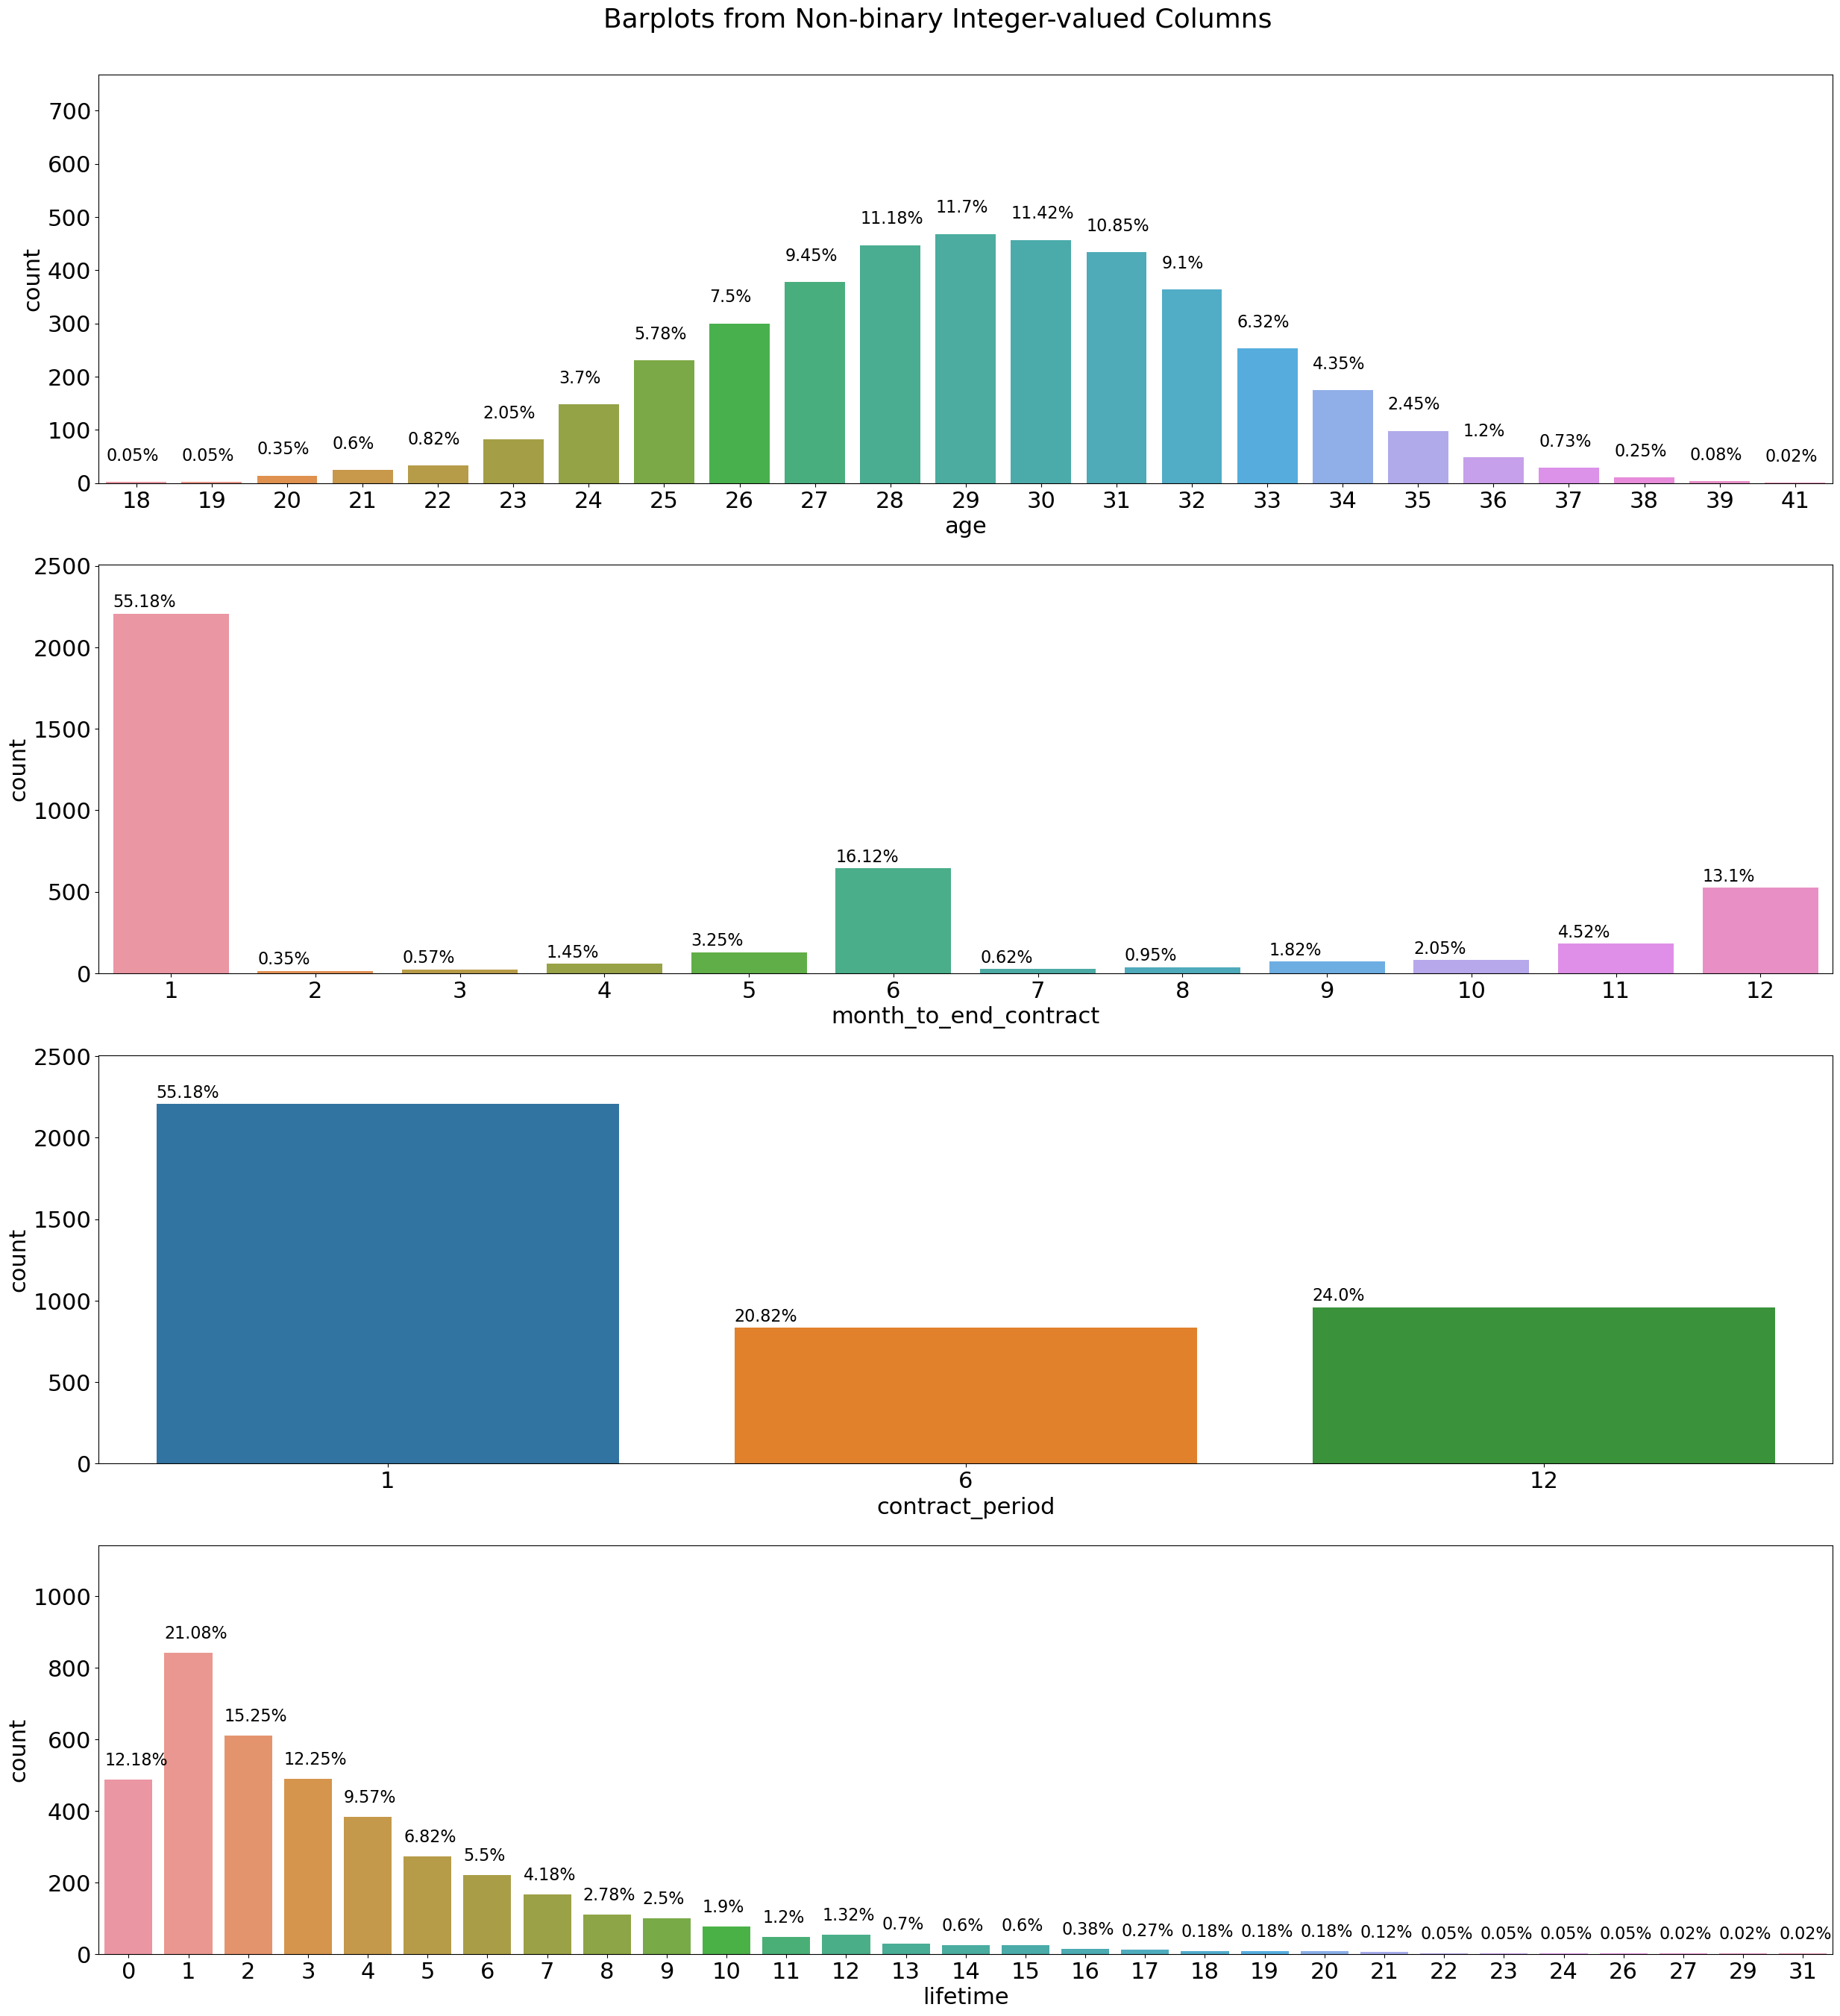

In [11]:
fig, ax = plt.subplots(4,1, figsize=(30, 30))
fig.subplots_adjust(top=0.95)

axs = ax.ravel()
j=0

for column in [ 'age', 'month_to_end_contract', 'contract_period', 'lifetime']:
    sns.countplot(x=column, data=gym, ax=axs[j])
 # create a list to collect the plt.patches data
    totals = []
# find the values and append to list
    for i in axs[j].patches:
        totals.append(i.get_height())
# set individual bar lables using above list
    total = sum(totals)
# set individual bar lables using above list
    for i in axs[j].patches:
    # get_x pulls left or right; get_height pushes up or down
        axs[j].text(i.get_x(), i.get_height()+40, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=16, color='black')
    axs[j].xaxis.label.set_size(22)
    axs[j].yaxis.label.set_size(22)
    axs[j].tick_params(axis ='both',labelsize = 22)
    axs[j].set_ylim(0, gym[column].value_counts().max()+300)
    j+=1
        
plt.suptitle('Barplots from Non-binary Integer-valued Columns', fontsize=26)
plt.show()    

**Kesimpulan:**

Data nilai yang diplotkan menunjukkan hal-hal berikut:

* Pelanggan berusia antara 18 hingga 41 tahun. Distribusi usia terlihat seperti distribusi normal dengan sebagian besar nilai terkonsentrasi pada kelompok usia akhir dua puluhan hingga awal tiga puluhan;
* Kontrak seitar 55% pelanggan akan berakhir dalam satu bulan. Kontrak akan berakhir dalam 6 bulan untuk sekitar 21% pelanggan dan dalam setahun untuk sekitar 24% pelanggan;
* Untuk masa pakai (lifetime), kita dapat melihat bahwa sangat sedikit pelanggan yang memiliki masa pakai lebih dari satu tahun. Sekitar 12% mendaftar ke gym pada bulan ini, yaitu masa aktif mereka diindikasikan sebagai 0 bulan, dan 21% pelanggan memiliki masa aktif 1. Kemudian masa aktif pelanggan secara relatif menurun di bulan-bulan berikutnya.

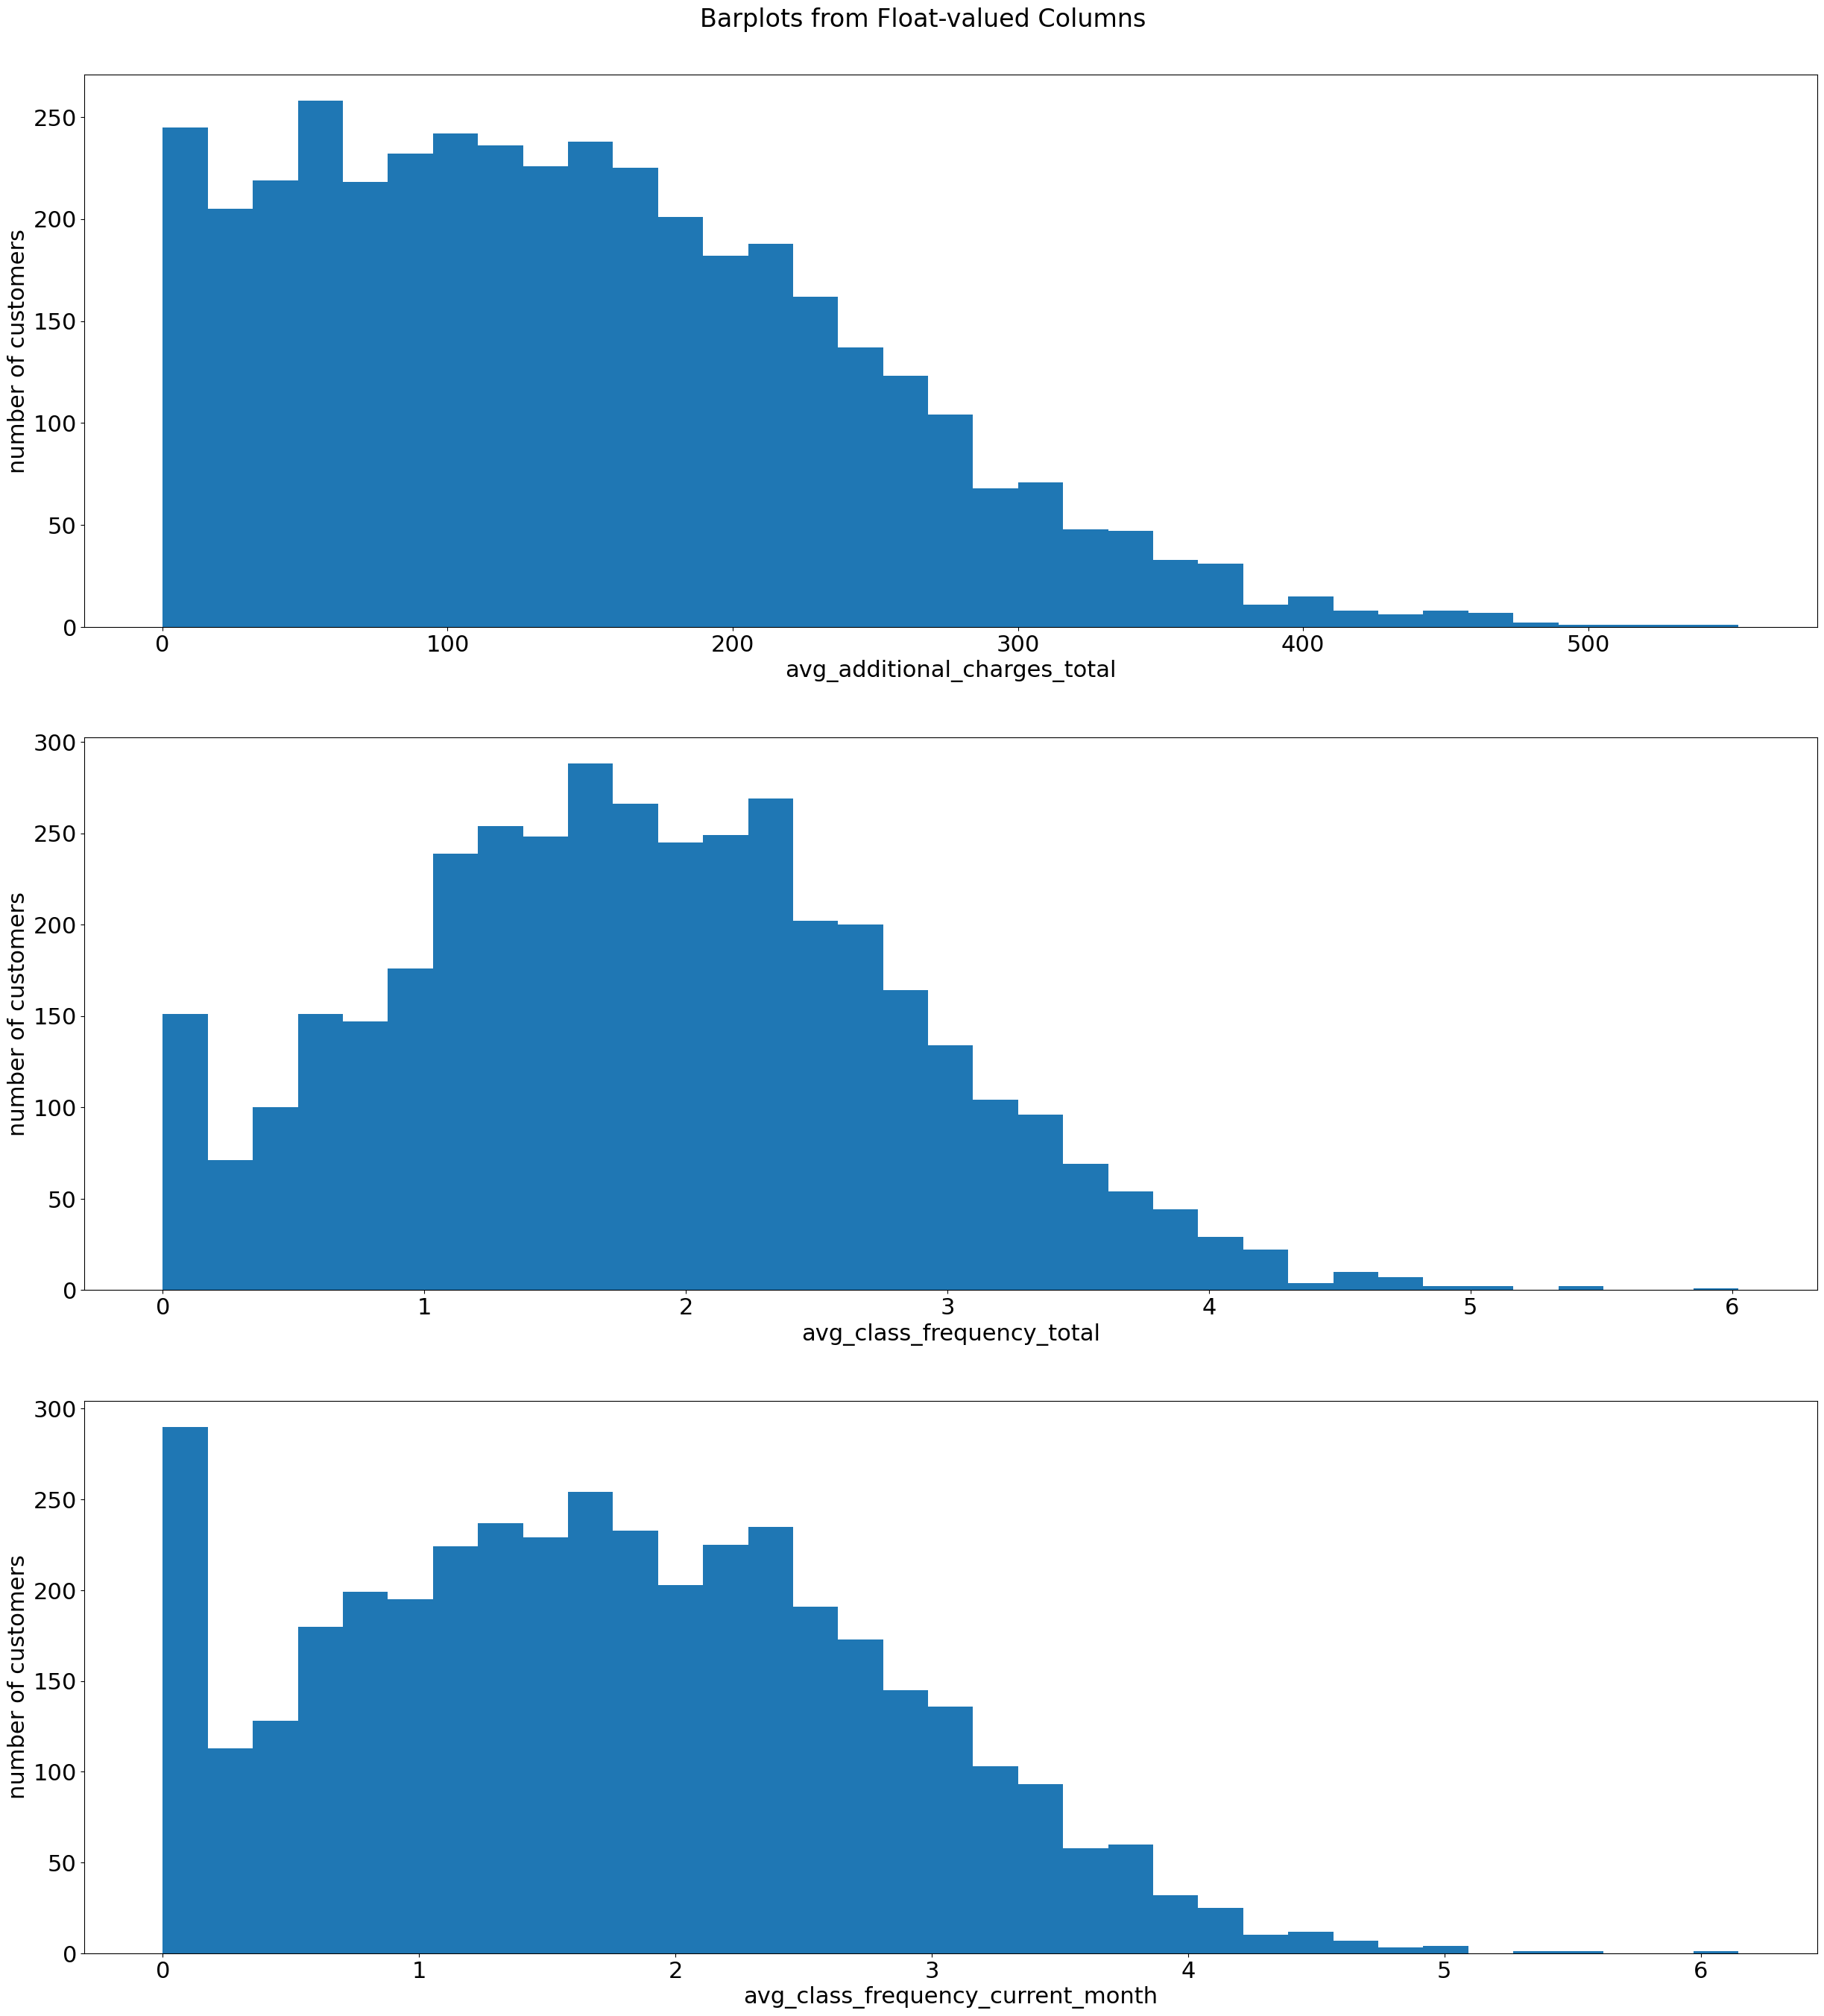

In [12]:
fig, ax = plt.subplots(3,1, figsize=(30, 30))
fig.subplots_adjust(top=0.95)

axs = ax.ravel()
j=0

y_labels = []
for column in ['avg_additional_charges_total', 
               'avg_class_frequency_total', 
               'avg_class_frequency_current_month']:
    axs[j].hist(x=gym[column], bins=35)
    axs[j].xaxis.label.set_size(22)
    axs[j].yaxis.label.set_size(22)
    axs[j].tick_params(axis ='both',labelsize = 22)
    axs[j].set_xlabel(column)
    axs[j].set_ylabel('number of customers')
    j+=1
        
plt.suptitle('Barplots from Float-valued Columns', fontsize=24)
plt.show()    

**Kesimpulan:**

Data nilai yang diplotkan menunjukkan hal-hal berikut:

* Jumlah total uang yang dibelanjakan untuk layanan gym lain tampaknya seragam hingga 200 USD, sementara itu terus menurun setelah ambang batas tersebut, tetapi untuk beberapa pelanggan bisa mencapai 500 USD bahkan lebih.
* Frekuensi rata-rata kunjungan per minggu selama lifetime pelanggan mencapai puncaknya sekitar 2 kunjungan per minggu dan terus menurun setelah itu. Namun, puncak lainnya diamati mendekati 0, menunjukkan bahwa sekitar 150 pelanggan tidak pernah kembali setelah minggu pertama, dan juga banyak pelanggan yang datang kurang dari sekali seminggu selama masa hidup mereka.
* Tren serupa juga terlihat pada plot yang menunjukkan frekuensi rata-rata kunjungan per minggu selama sebulan. Bahkan kedua plot tersebut terlihat serupa, dengan puncaknya mendekati 0 minggu bahkan lebih tinggi (dengan nilai mendekati 300 pelanggan) di plot kedua. Kami menduga bahwa pelanggan dengan frekuensi rata-rata kunjungan yang rendah per minggu selama masa hidup pelanggan memang muncul beberapa kali saat mereka mendaftar dan tidak muncul sama sekali di bulan sebelumnya.

### 2.2. Melihat nilai fitur rata-ratanya dalam dua kelompok (keluar (churn) dan tinggal)

In [13]:
#checking values for the contract period
gym.contract_period.value_counts().sort_values(ascending = False)

1     2207
12     960
6      833
Name: contract_period, dtype: int64

In [14]:
#let's see the size of each group
gym.groupby('churn').size()

churn
0    2939
1    1061
dtype: int64

In [15]:
#let's see the mean value for each group
gym.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


**Kesimpulan:**

Dari hasil groupby, yaitu mereka yang bertahan dan mereka yang keluar, data menunjukkan bahwa: 

* Jenis kelamin terdistribusi hampir sama.
* Sebagian besar klien masih tinggal di dekat gym.
* Di antara mereka yang keluar, sekitar 35% pelanggan adalah karyawan perusahaan mitra vs 53% untuk mereka yang bertahan
* Sebagian besar pelanggan memberikan nomor telepon mereka pada kedua kelompok baik yang bertahan dan meninggalkan
* Rata-rata kontrak yang dipinjamkan hampir 6 bulan untuk mereka yang bertahan vs 1. 
* Rata-rata usia pelanggan adalah 30 tahun untuk yang bertahan vs 27 tahun untuk yang meninggalkan
* Rata-rata pelanggan menghabiskan 158 untuk biaya tambahan untuk yang bertahan vs 115 untuk yang meninggalkan
* Rata-rata masa pakai adalah 4,7 bulan untuk yang bertahan vs 1 bulan untuk yang meninggalkan
* Rata-rata frekuensi kelas per minggu selama masa pakai adalah 2 kali untuk yang bertahan vs 1 kali untuk yang meninggalkan.

### 2.3. Histogram dan Distribusi Fitur Untuk yang Keluar (churn) dan yang Tinggal

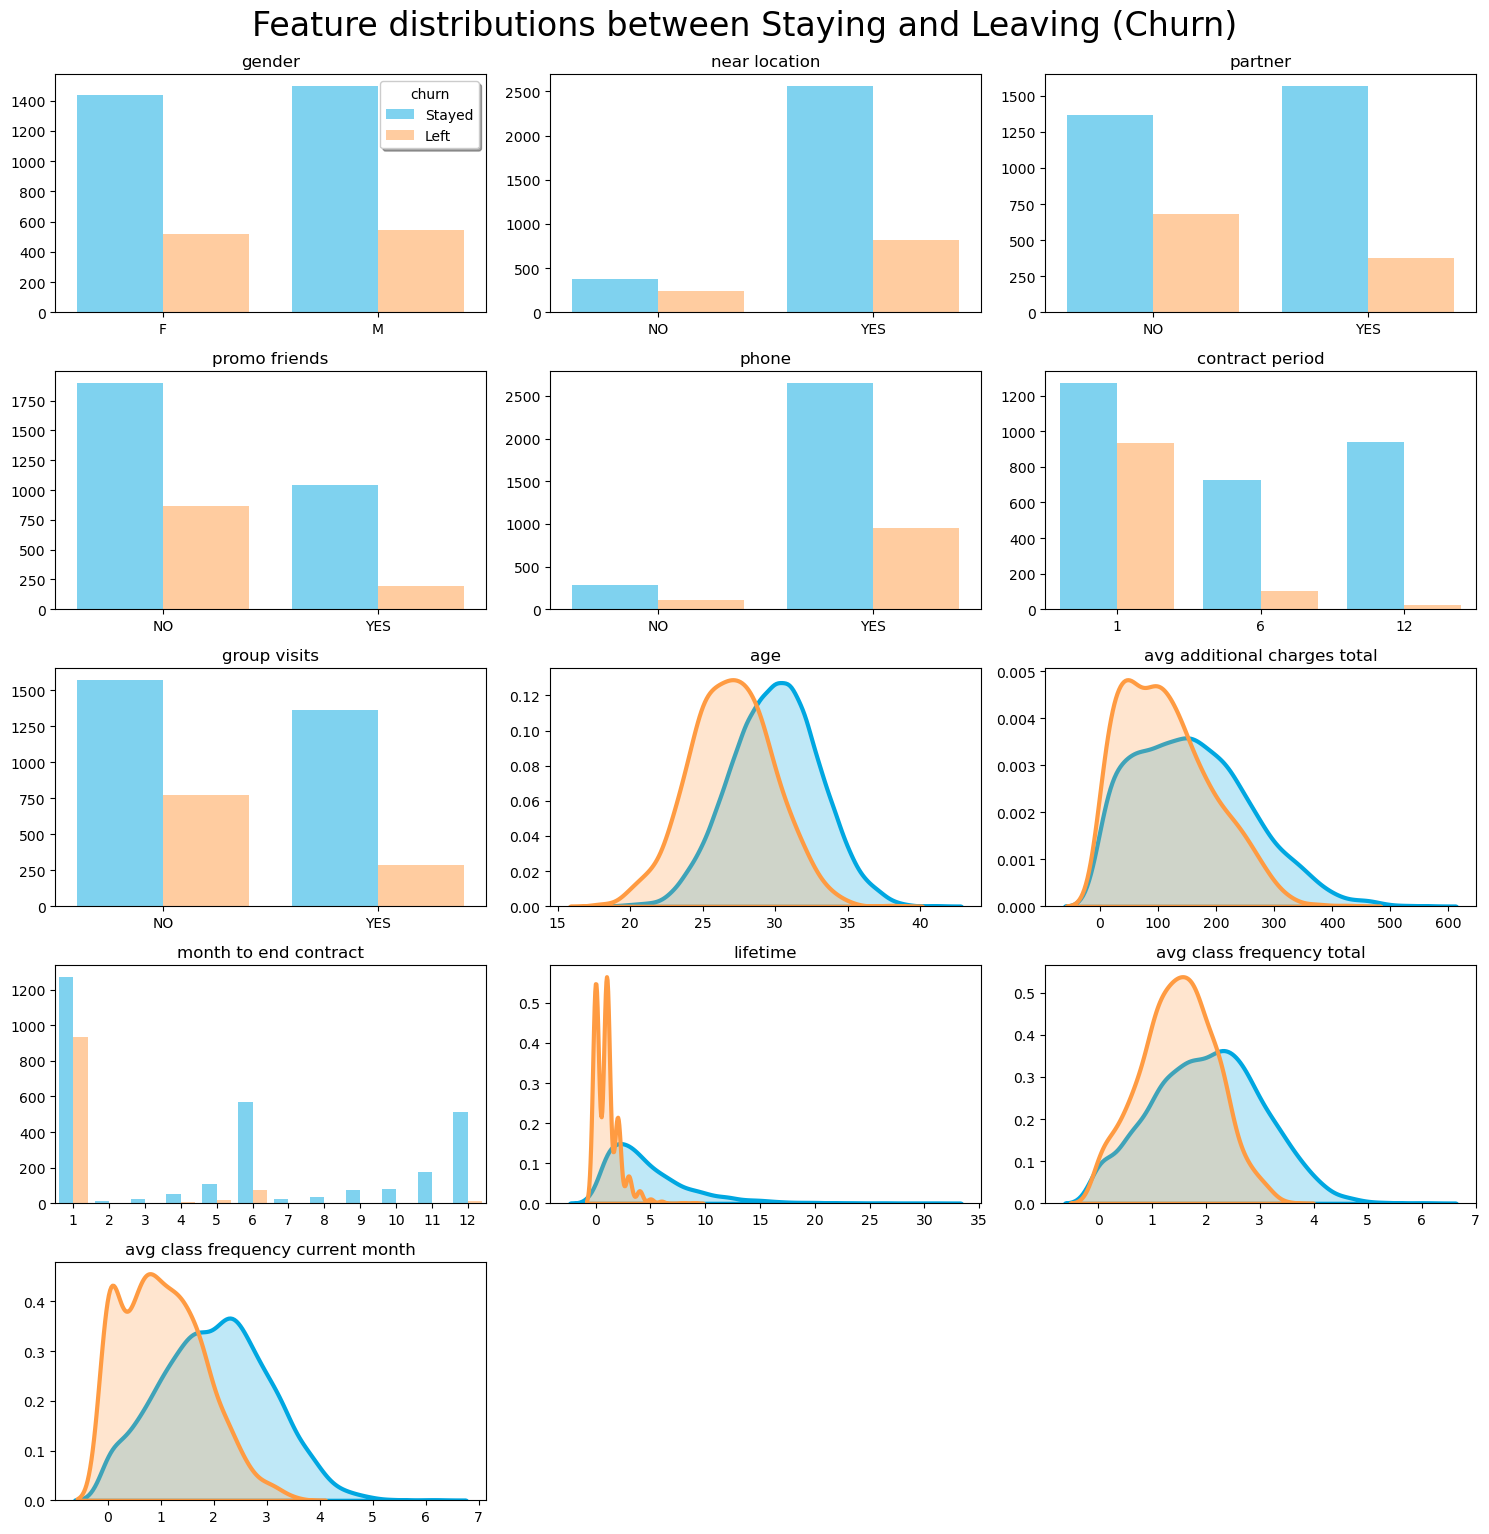

In [16]:
#let's define histograms
colors = ['#00A7E1','#FF9B42']

def plot_dist(df, feature):
    plt.figure(figsize=(15,15))
    the_grid = GridSpec(5, 3)
    # place in grid for plot
    for i, column in enumerate(df.drop(feature, axis = 1).columns):
        plt.subplot(the_grid[i//3, i%3], title=column.replace('_',' '))
        values = len(df[column].unique())
        features = sorted(df[feature].unique())
    # continuous vs discrete
        if values > 12:    
            for i,x in enumerate(features):
                sns.distplot(df[df[feature] == x][column], hist = False, 
                             kde_kws = {'shade': True, 'linewidth': 3}, color=colors[i])
        else:
            sns.countplot(column, hue=feature, data=gym, palette=colors, alpha=.5, saturation=1)
            plt.gca().get_legend().remove()
     # xticks       
            if values == 2:
                if column == 'gender':
                    plt.xticks(np.arange(values),('F','M'))
     # legend             
                    if feature == 'churn':
                        legend = ['Stayed','Left']
                    else:
                        legend = features
                    plt.legend(legend, shadow=True, fancybox=True, title=feature, loc='best')
                else:
                    plt.xticks(np.arange(values),('NO','YES'))
            else:
                plt.xticks(np.arange(values),[int(x) for x in sorted(df[column].unique())])
        plt.xlabel('')
        plt.ylabel('')
    plt.tight_layout()
    plt.suptitle('Feature distributions between Staying and Leaving (Churn)', fontsize=24, y=1.02)
    plt.show()
plot_dist(gym,'churn')

**Kesimpulan:**

Kita dapat mengkonfirmasi temuan yang sama seperti sebelumnya, misalnya, "bulan untuk mengakhiri kontrak" untuk mereka yang keluar sebagian besar adalah 1 bulan dan beberapa pelanggan akan keluar bahkan ketika mereka memiliki 6 bulan tersisa; masa pakai sebagian besar berada di sekitar 1 bulan; selain itu, mereka yang keluar lebih jarang pergi ke kelas mereka dan menghabiskan lebih sedikit uang untuk biaya tambahan daripada pelanggan yang lebih loyal.

### 2.4. Matriks Korelasi

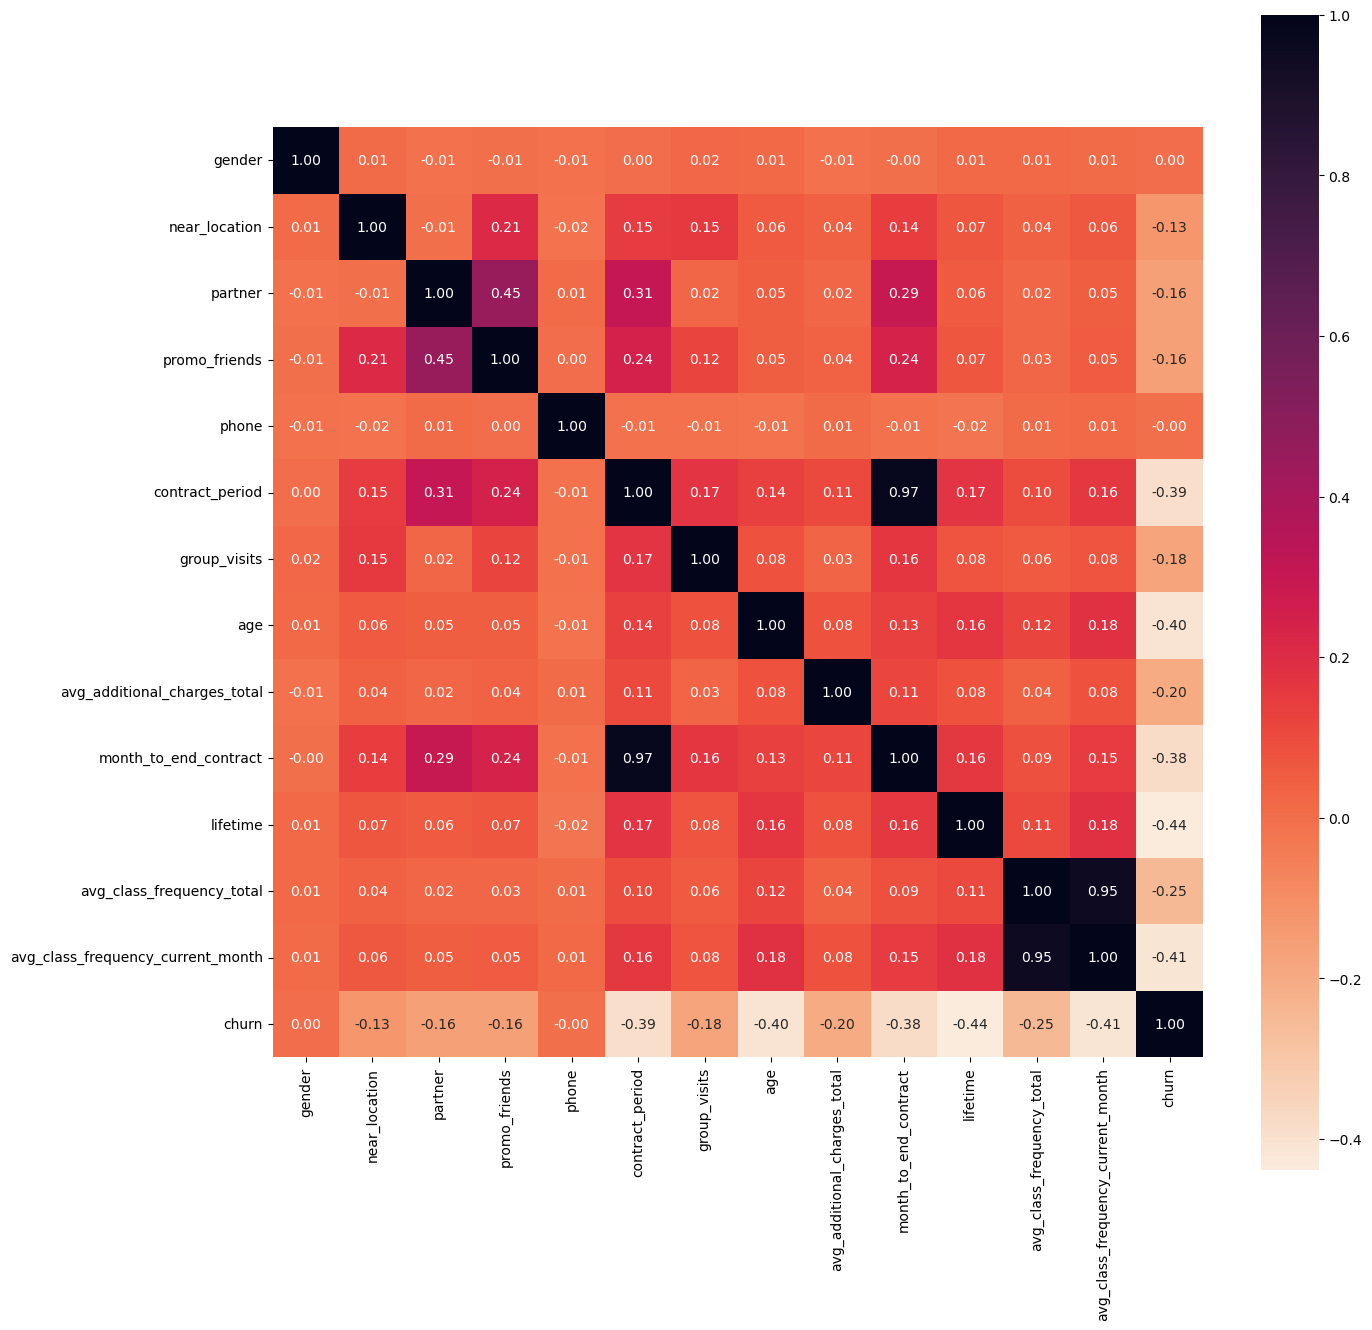

In [17]:
# correlation matrix
corr_m = gym.corr() 
plt.figure(figsize=(15,15))
sns.heatmap(corr_m, square = True, annot = True, cmap="rocket_r", fmt='.2f')
plt.show()

**Kesimpulan:**

Data heatmap, korelasi terkuat dalam fitur yang kami lihat (cukup jelas) antara frekuensi seumur hidup untuk kelas rata-rata vs frekuensi bulan terakhir - 95%; dan panjang kontrak vs waktu hingga akhir kontrak - 97%.

## 3. Model Untuk Memprediksi Churn

Mari kita bangun model klasifikasi biner untuk pelanggan di mana fitur targetnya adalah pengguna yang akan pergi bulan depan.

* Membagi data ke dalam set latih dan validasi menggunakan `fungsi train_test_split()`.
* Melatih model pada set pelatihan dengan dua metode:
    * logistic regression
    * random forest
* Mengevaluasi akurasi, presisi, dan recall untuk kedua model menggunakan data validasi.

Parameter random_state ketika membagi data dan mendefinisikan algoritma adalah 0.

In [18]:
#let's define the function that will output our metrics
def print_all_metrics(y_true, y_pred, y_proba, title = 'Classification metrics'):
    print(title) 
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tBalanced Accuracy: {:.2f}'.format(balanced_accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

In [19]:
#let's see data stability 
print('Dataset size:', gym.shape)

Dataset size: (4000, 14)


In [20]:
#let's look at the ratio between the dataset classes
gym['churn'].value_counts()

0    2939
1    1061
Name: churn, dtype: int64

Karena pembagian kita tidak seimbang, mari kita tambahkan parameter akurasi yang seimbang.

In [21]:
#let's divide the data into features (the X matrix) and a target variable (y)
X = gym.drop('churn', axis = 1)
y = gym['churn']

In [22]:
#let's divide the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
# train StandardScaler on the train set
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [24]:
# transform train and test sets
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [25]:
# define the algorithm for the logistic regression model
lr_model = LogisticRegression(solver='liblinear', random_state = 0)
# train the model
lr_model.fit(X_train_st, y_train)
# use the trained model to make predictions
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test)[:,1]
# print all metrics
lr=print_all_metrics(y_test, lr_predictions, lr_probabilities , title='Metrics for logistic regression:')
lr

Metrics for logistic regression:
	Accuracy: 0.92
	Balanced Accuracy: 0.89
	Precision: 0.85
	Recall: 0.83
	F1: 0.84
	ROC_AUC: 0.72


In [26]:
# define the algorithm for the new random forest model
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) 
# train the random forest model
rf_model.fit(X_train_st, y_train)
# use the trained model to make predictions
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]
# print all metrics
rf=print_all_metrics(y_test,rf_predictions,rf_probabilities, title = 'Metrics for random forest:')
rf

Metrics for random forest:
	Accuracy: 0.92
	Balanced Accuracy: 0.88
	Precision: 0.84
	Recall: 0.81
	F1: 0.83
	ROC_AUC: 0.97


Mari kita periksa lebih dalam: model yang lebih sederhana - decision tree calssifier dan model yang lebih kompleks: gradient boosting.

In [27]:
# define the algorithm for the new decision tree model
tree_model = DecisionTreeClassifier(random_state = 0)
# train the decision tree model
tree_model.fit(X_train_st, y_train)
# use the trained model to make predictions
tree_predictions = tree_model.predict(X_test_st)
tree_probabilities = tree_model.predict_proba(X_test_st)[:,1]
# print all metrics
tm=print_all_metrics(y_test, tree_predictions, tree_probabilities, title='Metrics for decision tree:')
tm

Metrics for decision tree:
	Accuracy: 0.90
	Balanced Accuracy: 0.87
	Precision: 0.79
	Recall: 0.80
	F1: 0.80
	ROC_AUC: 0.87


In [28]:
# do the same for the gradient boosting model
gb_model = GradientBoostingClassifier(n_estimators = 100, random_state = 0)
gb_model.fit(X_train_st, y_train)
gb_predictions = gb_model.predict(X_test_st)
gb_probabilities = gb_model.predict_proba(X_test_st)[:,1]
# print all metrics
gb=print_all_metrics(y_test, gb_predictions,gb_probabilities,title = 'Metrics for gradient boosting:')
gb

Metrics for gradient boosting:
	Accuracy: 0.93
	Balanced Accuracy: 0.90
	Precision: 0.88
	Recall: 0.84
	F1: 0.86
	ROC_AUC: 0.98


Kita dapat melihat kekuatan dari model kolektif - seberapa tinggi ROC_AUC dengan random forest dibandingkan dengan regresi logistik. Metrik ini menyampaikan informasi maksimum tentang kualitas model.

**Kesimpulan:**

* Kami membagi data ke dalam set pelatihan dan validasi menggunakan fungsi train_test_split() 20/80, melatih model pada set pelatihan pada awalnya dengan dua metode: logistic regression and random forest; dan kemudian dengan ecision tree and gradient boosting. Karena pemisahan antara mereka yang pergi dan mereka yang tinggal tidak seimbang, kami menambahkan parameter akurasi yang seimbang.
* Evaluating accuracy, precision, and recall untuk semua model, kami menggunakan data validasi. Parameter random_state 0 digunakan saat membagi data dan mendefinisikan algoritma.
* Kita dapat melihat kekuatan dari model kolektif - seberapa tinggi ROC_AUC dengan random forest dibandingkan dengan logistic regression. Metrik ini menyampaikan informasi maksimum tentang kualitas model.

## 4. Klaster Pengguna

Pembuatan klaster pengguna dengan menyisihkan kolom dengan data tentang churn dan mengidentifikasi cluster objek (pengguna):

* Menstandarisasi data.
* Menggunakan fungsi linkage() untuk membangun matriks jarak berdasarkan matriks fitur standar dan membuat dendogram.
* Melatih model pengelompokan dengan algoritma K-means dan memprediksi cluster pelanggan. (jumlah klaster n=5)
* Melihat nilai fitur rata-rata untuk cluster
* Memetakan distribusi fitur untuk cluster
* Menghitung tingkat churn rate untuk setiap cluster (menggunakan metode groupby())

In [29]:
# Standardizing the data, setting aside the column with data on churn
scaler = StandardScaler()
x_sc = scaler.fit_transform(gym.drop(columns = ['churn']))

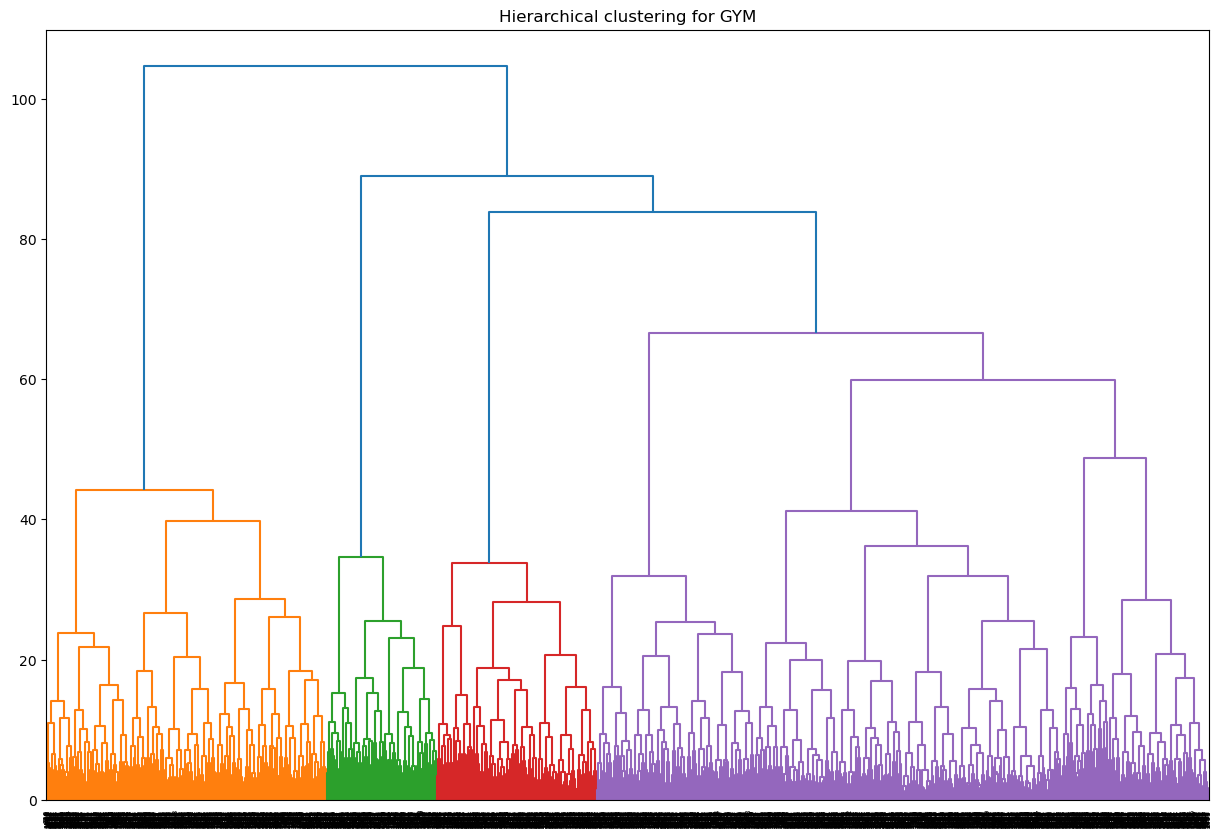

In [30]:
# Using the linkage() function to build a matrix of distances and ploting a dendrogram
linked = linkage(x_sc, method = 'ward') 
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top',show_leaf_counts=True)
plt.title('Hierarchical clustering for GYM')
plt.show() 

Dengan menggunakan grafik yang dihasilkan, kita dapat memperkirakan jumlah cluster yang dapat dipilih - 4.

Sekarang mari kita latih model pengelompokan dengan algoritma K-means dan memprediksi klaster pelanggan (jumlah klaster adalah 4).

In [31]:
#let's define the k_means model with 4 clusters
km = KMeans(n_clusters = 4, random_state=0)

In [32]:
# predict the clusters for observations (the algorithm assigns them a number from 0 to 4)
labels = km.fit_predict(x_sc)

In [33]:
# store cluster labels in the field of our dataset
gym['cluster'] = labels

In [34]:
# get the statistics of the mean feature values per cluster
mean_clusters = gym.drop('churn', axis=1).groupby(by='cluster').mean()
display(mean_clusters)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
cluster,,,,,,,,,,,,,
0,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967
1,0.486815,0.759297,0.381339,0.190669,1.0,1.899256,0.292765,28.048005,129.704525,1.805274,2.235294,1.204610,0.951590
2,0.544939,0.861873,0.343425,0.205298,1.0,2.403027,0.447493,29.989593,157.358764,2.239357,4.704825,2.724796,2.711132
3,0.503711,0.940631,0.777365,0.572356,1.0,10.697588,0.536178,29.912801,161.363032,9.768089,4.730056,1.983884,1.975592


**Kesimpulan:**

Saat memeriksa nilai fitur rata-rata di 4 klaster, kami melihat bahwa:
* Jenis kelamin terdistribusi kurang lebih sama.
* Sebagian besar pelanggan masih tinggal di dekat gym.
* Klaster3 (2) sekitar 34% pelanggan adalah karyawan perusahaan mitra vs 78% untuk klaster4 (3 pada tabel).
* Di klaster3 pelanggan memberikan nomor telepon mereka vs klaster1 (0) di mana mereka tidak memberikan nomor telepon mereka.
* Rata-rata minimum kontrak pinjaman hampir 2 bulan untuk cluster2 (1) vs 10,7 bulan untuk cluster4 (3).
* Rata-rata usia nasabah adalah antara 28 dan 30 tahun untuk semua cluster.
* Rata-rata minimum pelanggan menghabiskan 130 untuk biaya tambahan untuk cluster2 (1) vs 161 untuk cluster4 (3).
* Rata-rata masa pakai minimum adalah 2,2 bulan untuk cluster3 (2) vs 9,8 bulan untuk cluster4 (3) dan rata-rata frekuensi kelas per minggu selama masa pakai adalah 1,2 untuk cluster2 (1) vs 2,7 untuk cluster3 (2).

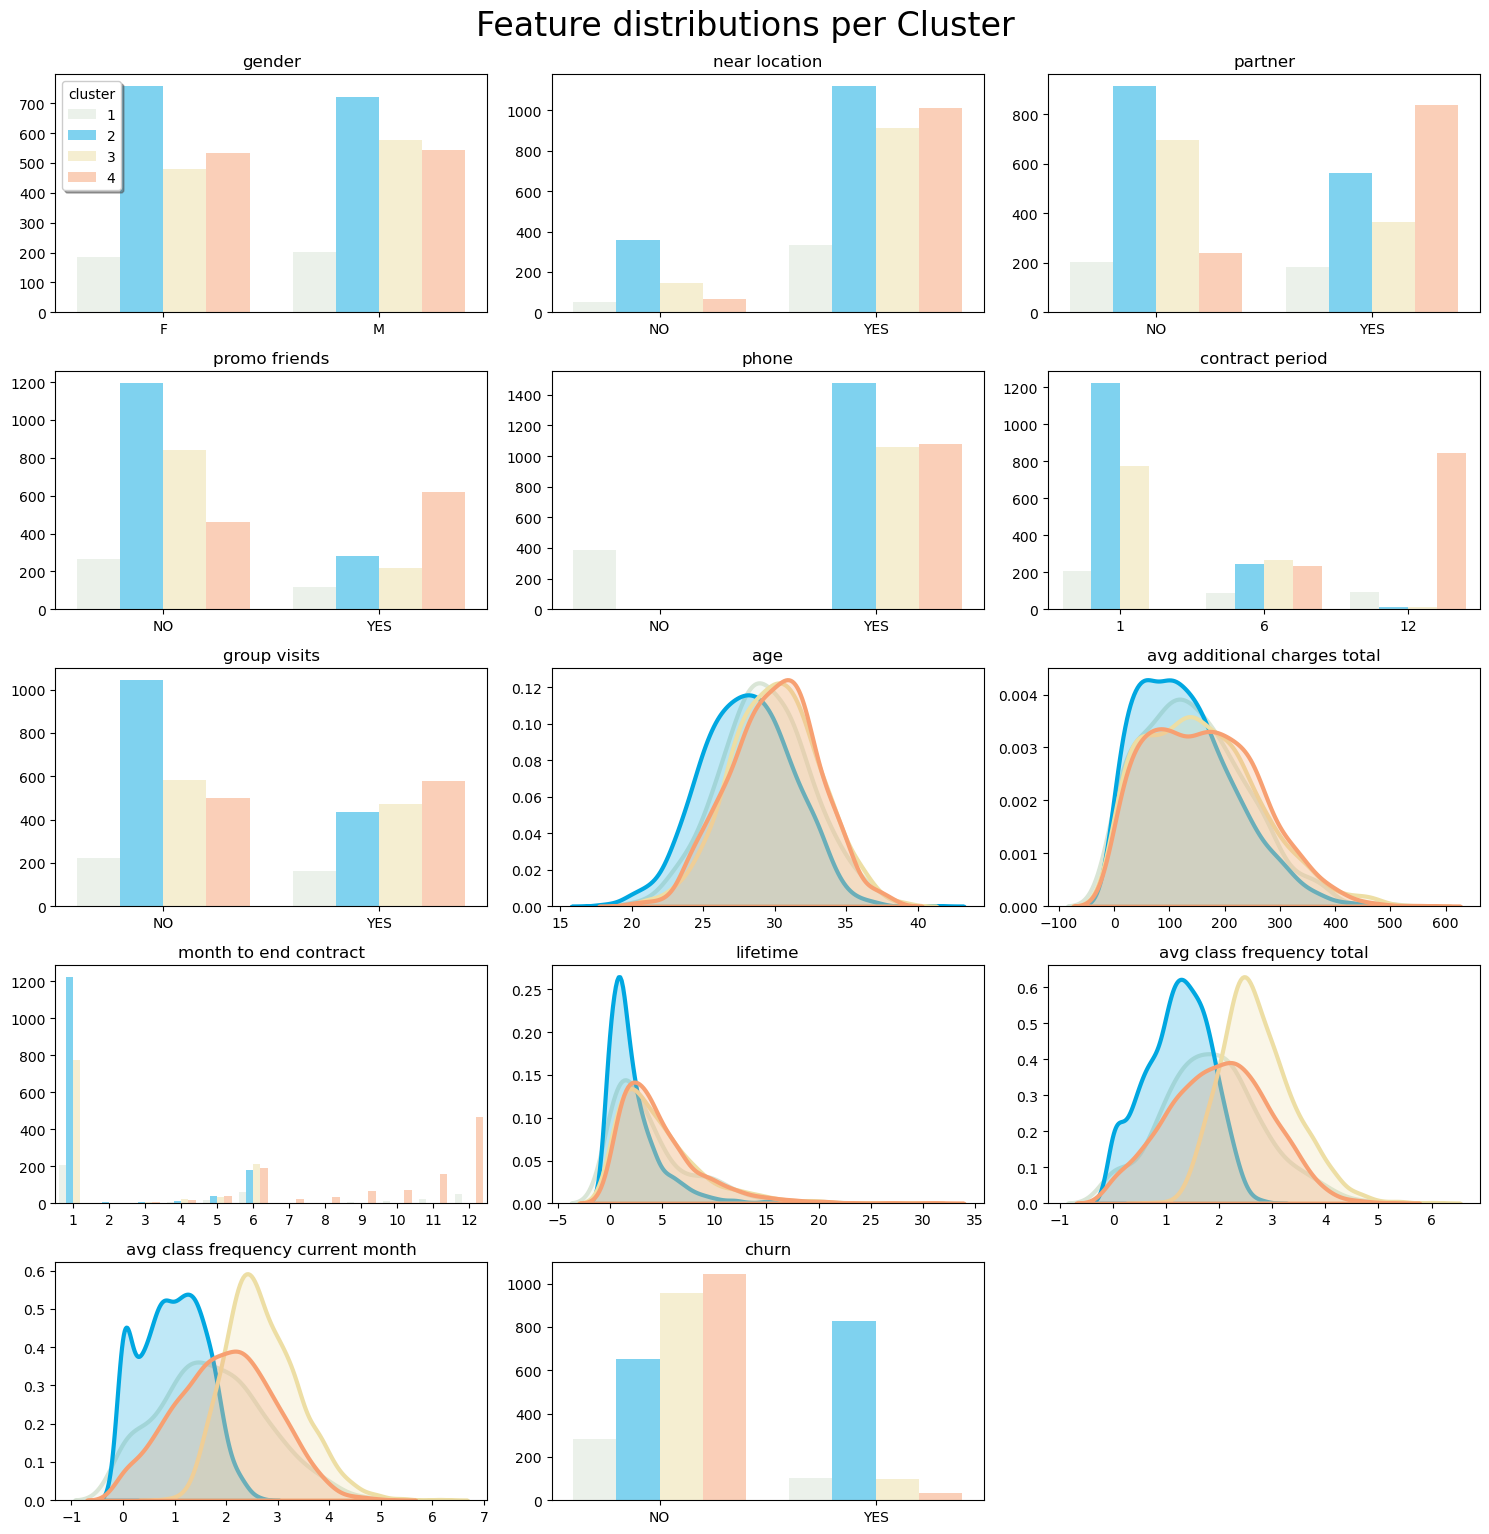

In [35]:
#let's define plot distribution of features for each claster
colors = ['#D9E5D6','#00A7E1','#EDDEA4','#F7A072']

def plot_dist(df, feature):
    plt.figure(figsize=(15,15))
    the_grid = GridSpec(5, 3)
    # place in grid for plot
    for i, column in enumerate(df.drop(feature, axis = 1).columns):
        plt.subplot(the_grid[i//3, i%3], title=column.replace('_',' '))
        values = len(df[column].unique())
        features = sorted(df[feature].unique())
    # continuous vs discrete
        if values > 12:    
            for i,x in enumerate(features):
                sns.distplot(df[df[feature] == x][column], hist = False, 
                             kde_kws = {'shade': True, 'linewidth': 3}, color=colors[i])
        else:
            sns.countplot(column, hue=feature, data=gym, palette=colors, alpha=.5, saturation=1)
            plt.gca().get_legend().remove()
     # xticks       
            if values == 2:
                if column == 'gender':
                    plt.xticks(np.arange(values),('F','M'))
     # legend             
                    if feature == 'cluster':
                        legend = ['1','2','3','4']
                    else:
                        legend = features
                    plt.legend(legend, shadow=True, fancybox=True, title=feature, loc='best')
                else:
                    plt.xticks(np.arange(values),('NO','YES'))
            else:
                plt.xticks(np.arange(values),[int(x) for x in sorted(df[column].unique())])
        plt.xlabel('')
        plt.ylabel('')
    plt.tight_layout()
    plt.suptitle('Feature distributions per Cluster', fontsize=24, y=1.02)
    plt.show()
plot_dist(gym,'cluster')

Kita bisa melihat gambaran yang hampir sama saat merencanakan distribusi fitur untuk cluster.

Sekarang mari kita hitung tingkat churn rate untuk setiap klaster dan lihat apakah ada perbedaan dalam hal tingkat churn rate - klaster mana yang cenderung keluar, dan mana yang loyal.

In [36]:
#let's calculate the churn rate for each cluster
churn=gym.groupby('cluster')['churn'].mean()
churn

cluster
0    0.266839
1    0.559838
2    0.092715
3    0.029685
Name: churn, dtype: float64

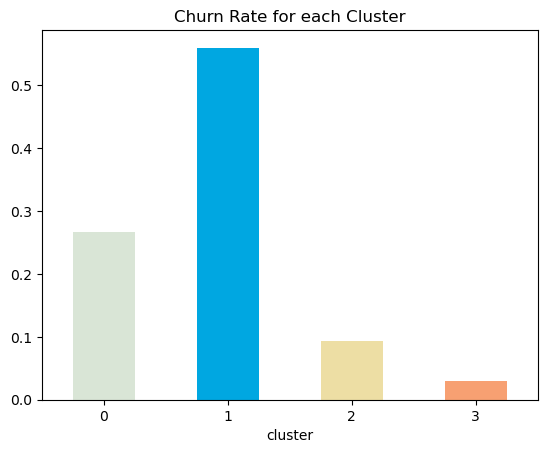

In [37]:
#let's see it in the graph
ax = churn.plot.bar(x='cluster', y='churn', rot=0, color=['#D9E5D6','#00A7E1','#EDDEA4','#F7A072'])
plt.title('Churn Rate for each Cluster')
plt.show()

Kita dapat melihat bahwa cluster4 (3) adalah yang paling loyal dan cluster2 (1) adalah cluster di mana pelanggan cenderung pergi.

**Kesimpulan:**

* Dari data, kami memperkirakan jumlah cluster yang dapat dipilih - 4.
* Kemudian kami melatih model pengelompokan dengan algoritma K-means dan memprediksi klaster pelanggan (jumlah klaster adalah 4). Setelah memprediksi cluster untuk observasi (algoritma memberi mereka nomor dari 0 hingga 3), kami menyimpan label cluster di bidang dataset kami - kolom "cluster".
* Kemudian ketika memeriksa nilai fitur rata-rata di 4 klaster.
* Kemudian, kami menghitung tingkat churn untuk setiap cluster dan menemukan bahwa cluster4 (3) adalah yang paling loyal dan cluster2 (1) adalah cluster di mana pelanggan cenderung pergi.

Oleh karena itu, disarankan untuk menjaga kelompok pelanggan ini - cluster4, untuk mencegah mereka pergi.

## Kesimpulan Umum

Penelitian yang diberikan menyelidiki perilaku pelanggan untuk Model Fitness, jaringan gym yang sedang mengembangkan strategi interaksi pelanggan berdasarkan data analitik.

#### A. Pra-pemrosesan

Dari eksplorasi pra-pemrosesan data, dapat disimpulkan bahwa:
1. Tabel data `gym` memiliki nilai sebanyak 4000 data dengan Setiap baris mewakili satu pelanggan dan karakteristiknya.
2. Asumsi umum untuk semua kasus selain jenis kelamin: 0 = tidak, 1 = ya; jenis kelamin: 0 = perempuan, 1 = laki-laki.
3. Tabel data `gym` diubah menjadi lower case untuk mempermudah analisis.


#### B. Analisis Data Esksploratif (EDA)

Dari hasil analisis data esksploratif, dapat disimpulkan bahwa:
1. Tidak terdapat nilai hilang dan nilai duplikat pada data.
2. Nilai rata-rata dan standar deviasi, secara data dan plot telah dinalisis dan memiliki berbagai macam kondisi.
3. Dari data churn, masih banyak pelanggan yang loyal.

#### C. Model Prediksi

Dari hasil analisis pemodelan prediksi, dapat disimpulkan bahwa:
* Kami membagi data ke dalam set pelatihan dan validasi menggunakan fungsi train_test_split() 20/80, melatih model pada set pelatihan pada awalnya dengan dua metode: logistic regression and random forest; dan kemudian dengan ecision tree and gradient boosting. Karena pemisahan antara mereka yang pergi dan mereka yang tinggal tidak seimbang, kami menambahkan parameter akurasi yang seimbang.
* Evaluating accuracy, precision, and recall untuk semua model, kami menggunakan data validasi. Parameter random_state 0 digunakan saat membagi data dan mendefinisikan algoritma.
* Kita dapat melihat kekuatan dari model kolektif - seberapa tinggi ROC_AUC dengan random forest dibandingkan dengan logistic regression. Metrik ini menyampaikan informasi maksimum tentang kualitas model.

#### D. Klaster Pengguna

Dari hasil analisis klaster pengguna, dapat disimpulkan bahwa:

* Dari data, kami memperkirakan jumlah cluster yang dapat dipilih - 4.
* Kemudian kami melatih model pengelompokan dengan algoritma K-means dan memprediksi klaster pelanggan (jumlah klaster adalah 4). Setelah memprediksi cluster untuk observasi (algoritma memberi mereka nomor dari 0 hingga 3), kami menyimpan label cluster di bidang dataset kami - kolom "cluster".
* Kemudian ketika memeriksa nilai fitur rata-rata di 4 klaster.
* Kemudian, kami menghitung tingkat churn untuk setiap cluster dan menemukan bahwa cluster4 (3) adalah yang paling loyal dan cluster2 (1) adalah cluster di mana pelanggan cenderung pergi.
* Oleh karena itu, disarankan untuk menjaga kelompok pelanggan ini - cluster4, untuk mencegah mereka pergi.

#### Rekomendasi

Berikut ini adalah daftar singkat rekomendasi yang kami miliki untuk membantu gym mengurangi perputaran pelanggan dan meningkatkan keuntungan:

* Sepertinya pelanggan yang lebih tua menghasilkan lebih banyak uang dari biaya tambahan daripada pelanggan yang lebih muda. Jadi, mungkin saja untuk meningkatkan keuntungan dengan memperkenalkan dan mengiklankan layanan yang membutuhkan biaya tambahan kepada pelanggan gym yang lebih tua.

* Di sisi lain, kami menemukan bahwa pelanggan termuda cenderung mendaftar untuk kontrak 1 bulan, mungkin untuk mencoba gym, namun berhenti di tengah jalan. Kami menyarankan untuk menganalisa lebih detail pelanggan di Cluster 1 dan mencari strategi untuk menggaet mereka. Fakta bahwa sebagian besar pelanggan di grup ini tidak bergabung melalui promosi dari mitra atau teman dan fakta bahwa pelanggan di grup ini kurang berminat pada sesi grup atau kelas harus diperhitungkan saat mendiskusikan strategi potensial.

* Kami juga merekomendasikan untuk memastikan bahwa nomor telepon pelanggan diperoleh pada saat pendaftaran. Seperti yang kita lihat, sekitar seperempat dari pelanggan Cluster 0 melakukan churn. Ini adalah klaster di mana tidak ada yang memberikan nomor telepon mereka dan di mana mayoritas memiliki kontrak 1 bulan. Tentu saja, jika gym tidak dapat menjangkau pelanggannya, tidak mungkin menjangkau mereka untuk tujuan iklan ketika mereka tidak lagi datang ke gym atau mereka memutuskan untuk pindah.
* Kemungkinan terjadinya churn jauh lebih tinggi bagi pelanggan yang tidak tinggal di dekat gym. Strategi retensi juga dapat dilakukan untuk mengurangi churn untuk pelanggan ini, meskipun persentase pelanggan yang tinggal jauh cukup kecil.

* Terakhir, seperti yang ditunjukkan oleh data, pelanggan yang bergabung melalui mitra dan yang juga teman ternyata cenderung menghabiskan lebih banyak uang melalui biaya tambahan dan mayoritas menandatangani kontrak 12 bulan. Oleh karena itu, strategi yang sangat baik tampaknya adalah meningkatkan jumlah organisasi mitra. Mengorganisir kegiatan khusus untuk organisasi mitra tertentu, seperti acara team building, dll., juga dapat membantu meningkatkan retensi dengan memotivasi rekan kerja untuk menjadi teman atau membuat lebih menarik untuk datang ke mereka yang sudah berteman.